##Goals :
- Mengetahui jumlah populasi penduduk di dunia
- Menganalisis pertumbuhan populasi dari tahun ke tahun
- Mengidentifikasi 10 Negara yang memiliki populai penduduk terbanyak di dunia
- Menganalisis alasan terjadinya peningkatan populasi penduduk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Pastel1')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('world_population.csv')
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
df.shape

(234, 17)

###A. Apakah terdapat data yang mengalami duplicated?

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
229    False
230    False
231    False
232    False
233    False
Length: 234, dtype: bool

In [ ]:
df.duplicated().sum()

0

####Tidak ada data yang duplicated

###B. Apakah terdapat dtype yang tidak sesuai?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

####Dtype sudah sesuai

###C. Apakah terdapat data yang missing values?

In [ ]:
df.isna().sum().sort_values(ascending=False)

Rank                           0
2000 Population                0
Growth Rate                    0
Density (per km²)              0
Area (km²)                     0
1970 Population                0
1980 Population                0
1990 Population                0
2010 Population                0
CCA3                           0
2015 Population                0
2020 Population                0
2022 Population                0
Continent                      0
Capital                        0
Country/Territory              0
World Population Percentage    0
dtype: int64

####Tidak ada data yang missing values

###D. Apakah terdapat data yang outliers?

In [ ]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

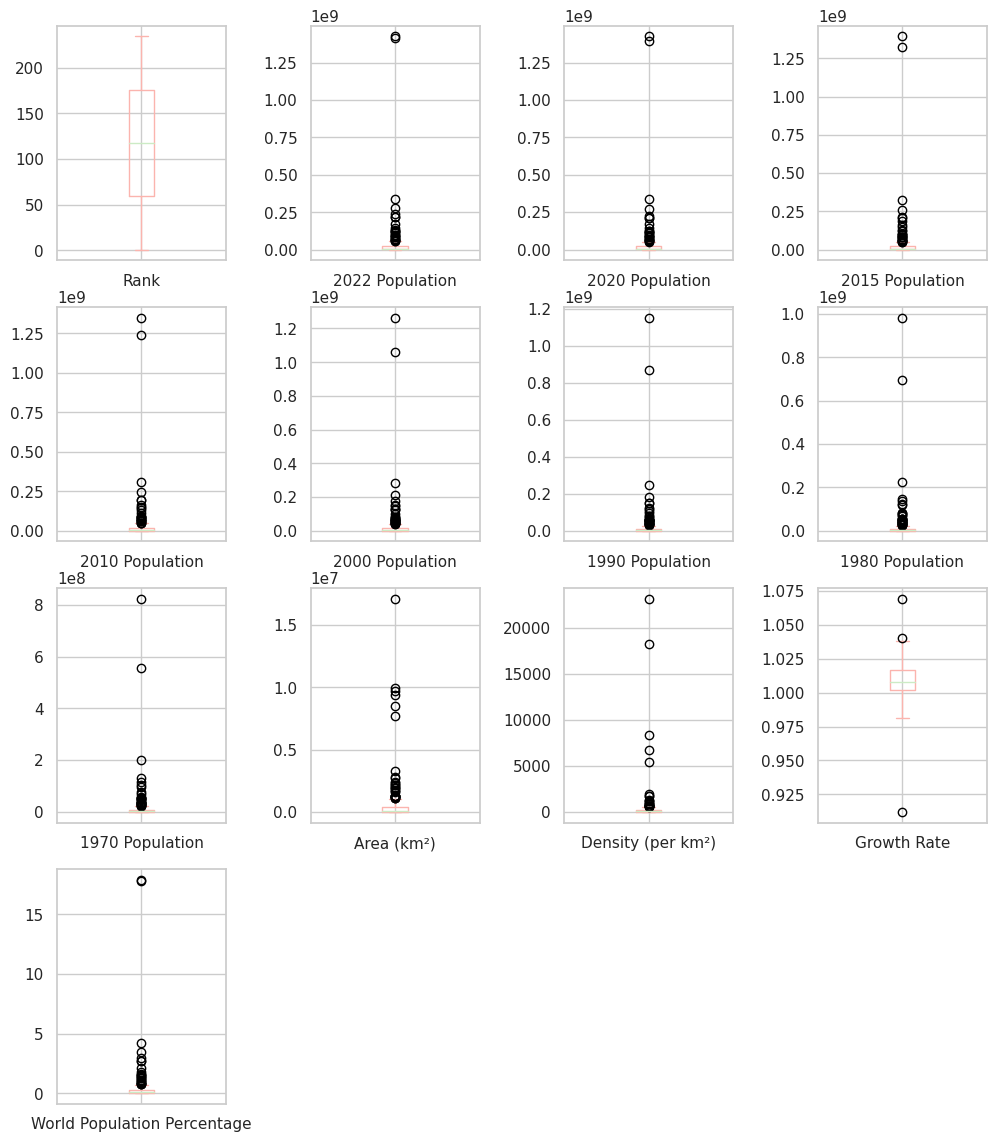

In [ ]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [ ]:
numeric = df.columns
numeric

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

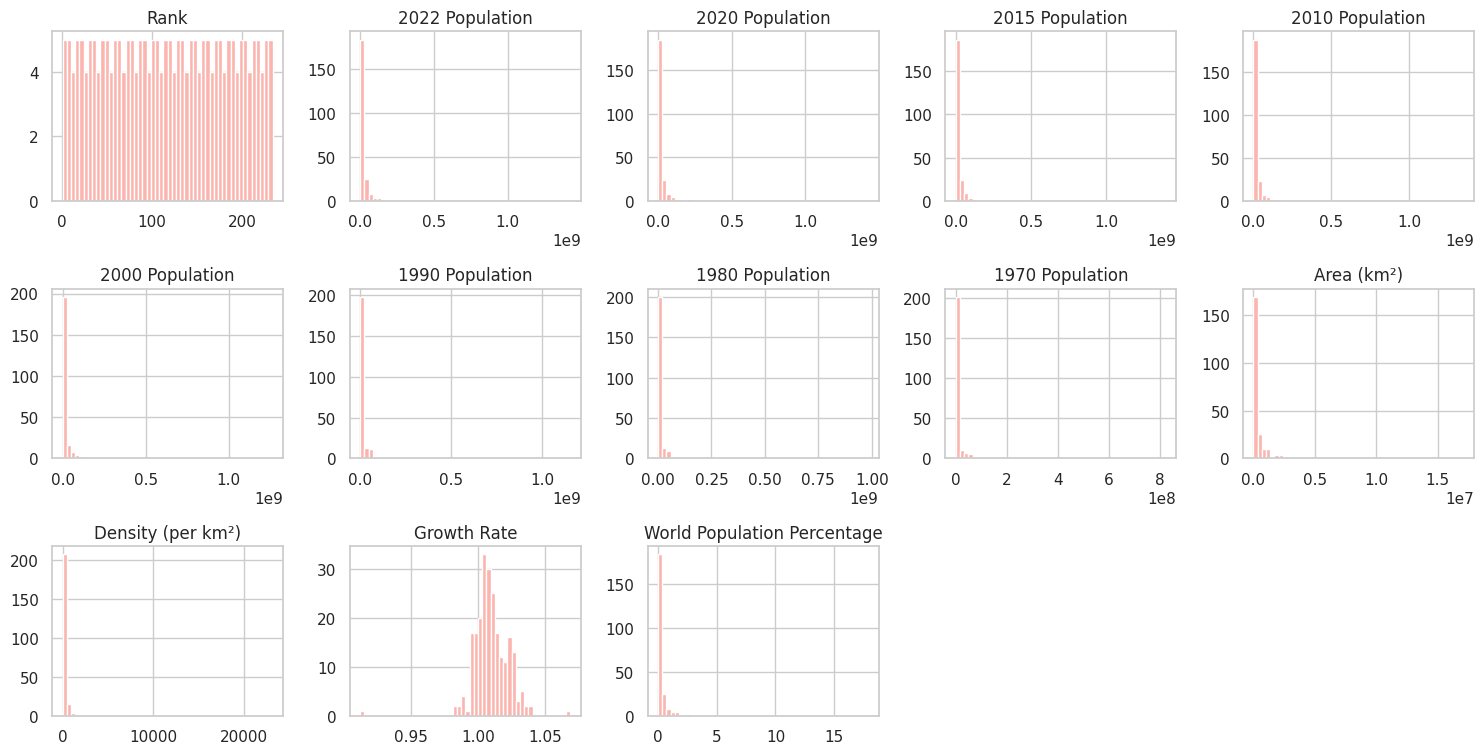

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,5), column=numeric)
plt.tight_layout()
plt.show()

## Data Splitting :
- Data Train (Mempelajari data-data dan pola-pola) = 60%
- Data Validation (Untuk mengevaluasi data yang sudah ada di Data Train) = 20%
- Data Test (Untuk pengetesan kembali setelah data validation) = 20%

In [ ]:
df = pd.read_csv('world_population.csv')
df.shape

(234, 17)

In [ ]:
from sklearn.model_selection import train_test_split
#Fungsi ini digunakan untuk membagi dataset menjadi dua subset: subset untuk pelatihan (training) dan subset untuk pengujian (testing), yang berguna dalam melakukan evaluasi mode

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

#train_test_split berfungsi untuk membagi variabel panggilan menjadi 2 jenis, yaotu df_full_train, df_test untuk code pertama dan df_train, df_valid untuk code kedua

In [ ]:
df_train.shape, df_valid.shape, df_test.shape

((140, 17), (47, 17), (47, 17))

In [ ]:
140/234, 47/234, 47/234

(0.5982905982905983, 0.20085470085470086, 0.20085470085470086)

In [ ]:
df.to_csv('world_population_new.csv', index=False)